In [51]:
import pandas as pd
import seaborn as sns
import datetime as dt

In [83]:
# https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p 
film_permits = pd.read_csv("/Users/sam/Documents/projects/ds course/Film_Permits.csv", parse_dates=["StartDateTime", "EndDateTime", "EnteredOn"])

In [56]:
film_permits.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,628327,Shooting Permit,2022-03-08 07:00:00,2022-03-08 19:00:00,2022-02-28 11:13:50,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,94,Television,Pilot,United States of America,11222
1,629351,Shooting Permit,2022-03-08 07:00:00,2022-03-08 22:00:00,2022-03-03 14:51:17,"Mayor's Office of Film, Theatre & Broadcasting",COVERT ST between WYCKOFF AVENUE and IRVING AV...,Queens,5,104,Television,Episodic series,United States of America,"11237, 11385"
2,629319,Shooting Permit,2022-03-08 07:00:00,2022-03-08 21:00:00,2022-03-03 13:49:15,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,90,Television,Cable-episodic,United States of America,11206
3,629309,Shooting Permit,2022-03-08 07:00:00,2022-03-08 20:00:00,2022-03-03 13:30:28,"Mayor's Office of Film, Theatre & Broadcasting",BARCLAY STREET between BROADWAY and CHURCH STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10007, 10013, 10282"
4,629504,Shooting Permit,2022-03-08 16:00:00,2022-03-09 06:00:00,2022-03-04 08:44:43,"Mayor's Office of Film, Theatre & Broadcasting",WEST 13 STREET between 10 AVENUE and WASHING...,Manhattan,2,6,Film,Feature,United States of America,10014


In [109]:
film_permits.describe(include="all")

/var/folders/pf/fv0ly2656kjc4_pqx05d4qbw0000gn/T/ipykernel_48784/1889652796.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  film_permits.describe(include="all")
/var/folders/pf/fv0ly2656kjc4_pqx05d4qbw0000gn/T/ipykernel_48784/1889652796.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  film_permits.describe(include="all")
/var/folders/pf/fv0ly2656kjc4_pqx05d4qbw0000gn/T/ipykernel_48784/1889652796.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),StartMonth,StartYear,YrMo
count,13630.000000,13630,13630,13630,13630,13630,13630,13630,13627,13627,13630,13630,13630,13627,13630.00000,13630.000000,13630
unique,NaN,4,5261,6403,13442,1,7948,5,382,884,9,27,3,1589,NaN,NaN,25
top,NaN,Shooting Permit,2021-11-18 07:00:00,2021-03-29 22:00:00,2021-10-08 13:24:11,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,1,94,Television,Episodic series,United States of America,11222,NaN,NaN,2022-3
freq,NaN,11959,16,12,5,13630,246,5699,3585,2121,8642,5957,13608,1964,NaN,NaN,698
first,NaN,NaN,2021-01-04 00:01:00,2021-01-04 20:00:00,2020-11-19 10:46:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2023-01-20 13:00:00,2023-02-20 18:00:00,2023-01-18 14:34:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,625321.221056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.57887,2021.562803,NaN
std,39060.595411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.37043,0.531476,NaN
min,552200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,2021.000000,NaN
25%,596765.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00000,2021.000000,NaN


In [118]:
(film_permits.groupby(
    ["Borough", "ZipCode(s)"])
    .count()["EventID"]
    .reset_index()
    .sort_values("EventID",ascending=False)
    .head(10)
)

,Borough,ZipCode(s),EventID
398,Brooklyn,11222,1963
1334,Queens,11101,1005
1030,Manhattan,10019,329
1157,Manhattan,10023,318
683,Manhattan,"10003, 10029",250
826,Manhattan,10011,225
1448,Queens,"11237, 11385",218
193,Brooklyn,11201,214
1274,Manhattan,"10036, 10105",210
373,Brooklyn,11217,199


In [126]:
borough = "Queens"

top_10_queens = (film_permits
 .query("Borough == @borough")
 .groupby("ZipCode(s)")
 .count()["EventID"]
 .reset_index()
 .sort_values("EventID", ascending=False).head(10))

sns.barplot(top_10_queens, x="ZipCode(s)", y="EventID")

<AxesSubplot: xlabel='ZipCode(s)', ylabel='EventID'>

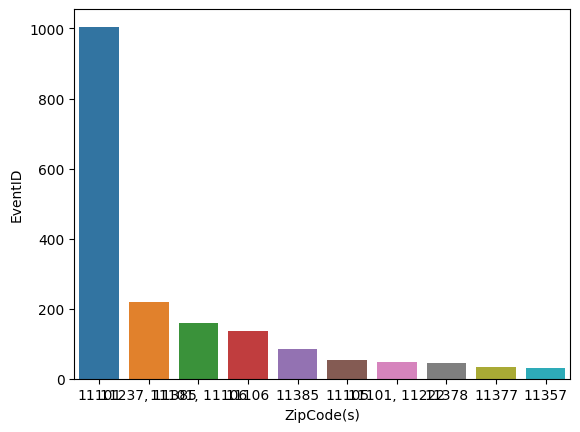

In [128]:
sns.barplot(top_10_queens, x="ZipCode(s)", y="EventID")

In [46]:
film_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EventID            13630 non-null  int64 
 1   EventType          13630 non-null  object
 2   StartDateTime      13630 non-null  object
 3   EndDateTime        13630 non-null  object
 4   EnteredOn          13630 non-null  object
 5   EventAgency        13630 non-null  object
 6   ParkingHeld        13630 non-null  object
 7   Borough            13630 non-null  object
 8   CommunityBoard(s)  13627 non-null  object
 9   PolicePrecinct(s)  13627 non-null  object
 10  Category           13630 non-null  object
 11  SubCategoryName    13630 non-null  object
 12  Country            13630 non-null  object
 13  ZipCode(s)         13627 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


In [20]:
borough_count = pd.DataFrame(film_permits.groupby("Borough").count()["EventID"]).reset_index()

<AxesSubplot: xlabel='Borough', ylabel='EventID'>

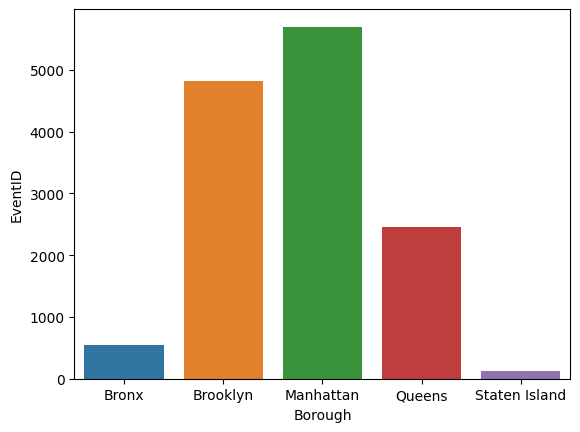

In [22]:
sns.barplot(borough_count, x="Borough", y="EventID")

<AxesSubplot: xlabel='Borough', ylabel='EventID'>

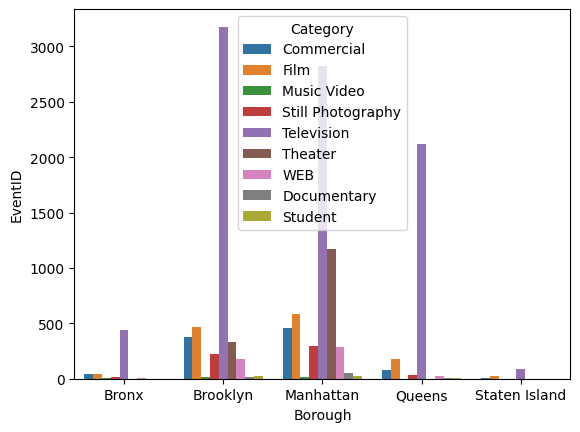

In [36]:
sns.barplot(
    film_permits.groupby(["Borough", "Category"]).count()["EventID"].reset_index(),
    x="Borough",
    y="EventID",
    hue="Category")



In [58]:
film_permits["StartDateTime"][1].year

2022

In [103]:
film_permits["StartMonth"] = film_permits["StartDateTime"].apply(lambda x: x.month)
film_permits["StartYear"] = film_permits["StartDateTime"].apply(lambda x: x.year)
film_permits["YrMo"] = film_permits.apply(lambda df: str(df.StartYear) + "-" + str(df.StartMonth), axis=1)
year_month_events = film_permits.groupby(["Borough", "StartYear", "StartMonth", "YrMo"]).count()["EventID"].reset_index()

In [104]:
year_month_events.head()

,Borough,StartYear,StartMonth,YrMo,EventID
0,Bronx,2021,1,2021-1,33
1,Bronx,2021,2,2021-2,30
2,Bronx,2021,3,2021-3,50
3,Bronx,2021,4,2021-4,34
4,Bronx,2021,5,2021-5,28


<AxesSubplot: xlabel='YrMo', ylabel='EventID'>

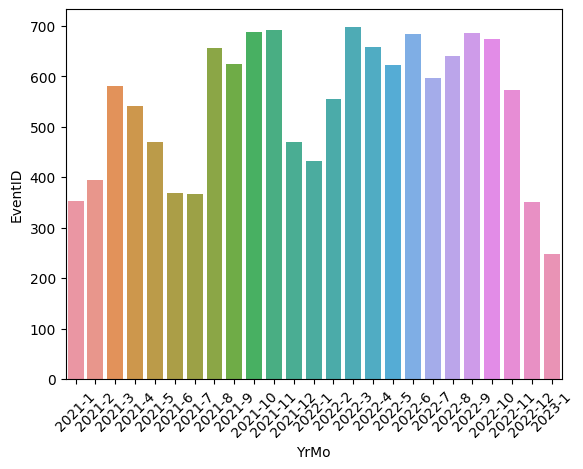

In [99]:
import matplotlib.pyplot as plt
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.barplot(year_month_events, x="YrMo", y="EventID")

<AxesSubplot: xlabel='YrMo', ylabel='EventID'>

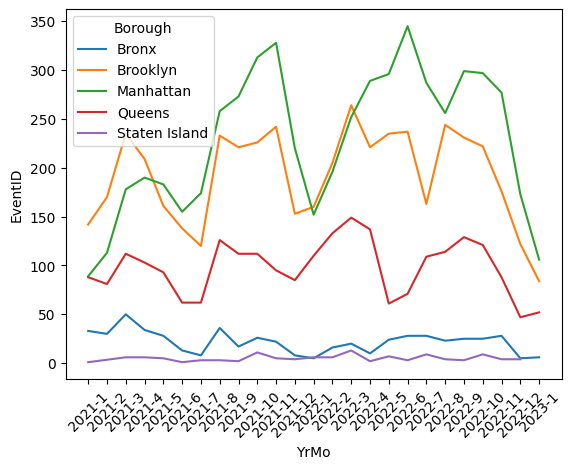

In [105]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

sns.lineplot(year_month_events, x="YrMo", y="EventID", hue="Borough")

In [130]:
(film_permits
 .query("Category == 'Film'")
 .groupby(
    ["Borough", "Category"])
    .count()["EventID"]
    .reset_index()
    .sort_values("EventID",ascending=False)
    .head(10)
)

,Borough,Category,EventID
2,Manhattan,Film,580
1,Brooklyn,Film,469
3,Queens,Film,178
0,Bronx,Film,39
4,Staten Island,Film,23
